# Given

Train data

|   x1  |   x2  |
|-------|-------|
| 1.84  | 4.61  |
| 5.66  | 4.80  |
| 6.35  | 3.29  |
| 2.90  | 4.61  |
|  ...  |  ...  |
| 1.25  | 4.93  |


and a quantity of clusters

# Calculate

Perform K-Means clustering and adjust centroids

# Solution

In [211]:
import numpy as np
import matplotlib.pyplot as plt

In [212]:
data = np.load("Lab1_data.npy")
data.shape

(300, 2)

Plot dataset

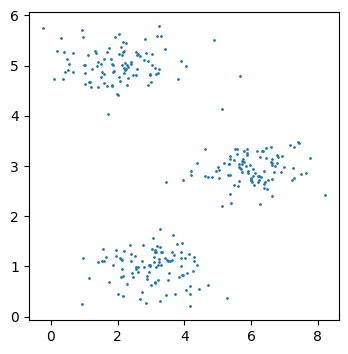

In [213]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(data[:,0], data[:,1], s=1)

Initialize centroids randomly

In [214]:
m = 3 # 3 centroids

random_location = [int(idx) for idx in np.random.rand(m)*data.shape[0]]
random_centroids = data[random_location]
#random_centroids = np.array([[2.05670542, 5.23391326], [2.17777173, 4.86154019], [2.95177039, 0.89583143]]) # Case when resolution is not ideal

random_location, random_centroids

([257, 295, 66],
 array([[6.40773863, 2.67554951],
        [7.30278708, 3.38015979],
        [2.26901428, 4.61818883]]))

In [216]:
loss = []

# log of centroids moving
centroids_log = {0: random_centroids.copy()}

# max iterations
for i in range(1000):

    assignment = []
    idx_loss = 0

    for point in data:

        distances = np.sum((point - random_centroids)**2, axis=1)
        min_distance = np.argmin(distances)
        assignment.append(min_distance)
        idx_loss += np.sum((random_centroids[min_distance] - point)**2, axis=0)

    if i > 0 and abs(idx_loss - loss[-1]) < 1 :
        break

    loss.append(idx_loss)

    assignment = np.array(assignment)

    # adjust centroids to new location (mean of all assignment)

    for idx in range(len(random_centroids)):
        mean = data[assignment==idx]
        new_centroid = np.mean(mean, axis=0)
        random_centroids[idx] = new_centroid

    centroids_log[i+1] = random_centroids.copy()

[1420.1182443598766, 909.6299726810167, 592.4164196315608, 280.79538650132054, 266.97769964171516]


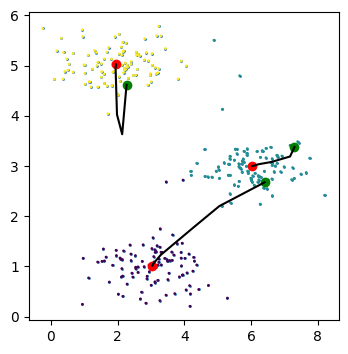

In [227]:
fig, ax = plt.subplots(figsize=(4,4))
ax.scatter(data[:,0], data[:,1], s=1)
ax.scatter(data[:,0], data[:,1], c=assignment, s=1)

centroid_start = centroids_log[0]
ax.scatter(centroid_start[:,0], centroid_start[:,1], c='g')

first_centroid = np.array([val[0,:] for val in centroids_log.values()])
ax.plot(first_centroid[:,0], first_centroid[:,1], c='black')

second_centroid = np.array([val[1,:] for val in centroids_log.values()])
ax.plot(second_centroid[:,0], second_centroid[:,1], c='black')

third_centroid = np.array([val[2,:] for val in centroids_log.values()])
ax.plot(third_centroid[:,0], third_centroid[:,1], c='black')

centroid_end = list(centroids_log.values())[-1]
ax.scatter(centroid_end[:,0], centroid_end[:,1], c='r')